# (Title)


## Introduction

### Load data

In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(lubridate)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [5]:
players <- read_csv("https://raw.githubusercontent.com/yunan-Deng/data_science_100_group33/refs/heads/main/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


The question that we have chosen to explore is: Does the player's total hours played and age predict whether they subscribe to the newsletter? Although given data from both the players and the sessions they played, we will only be using data from `players.csv` to answer the question.

For `players.csv`, there are a total of 196 observations and 7 columns (variables), which include:
- `experience (chr)`: The player's skill level (Beginner, Amateur, Regular, Veteran, Pro)
- `subscribe (lgl)`: Whether the player has an active subscription (TRUE = active, FALSE = inactive)
- `hashedEmail (chr)`: Encrypted email for security and privacy
- `played_hours (dbl)`: The number of hours the player has spent on the game
- `name (chr)`: The name of the player
- `gender (chr)`: The gender of the player
- `Age (dbl)`: The age of the player

For our specific question, the data is already clean, and so no tidying is needed. However, some wrangling must be done.

In [6]:
players <- players |>
    mutate(subscribe = as.factor(subscribe),
          experience = as.factor(experience))
players_clean <- players |>
    select(experience, subscribe, played_hours, Age)
head(players_clean)

experience,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Veteran,TRUE,3.8,17
Veteran,FALSE,0.0,17
Amateur,TRUE,0.7,21
Regular,TRUE,0.1,21
Amateur,TRUE,0.0,17


In [15]:
subscriber_count <- players_clean |>
    summarize(subscribed = sum(subscribe == TRUE, na.rm = TRUE), unsuscribed = sum(subscribe == FALSE, na.rm = TRUE))
subscriber_count


subscribed,unsuscribed
<int>,<int>
144,52


In [16]:
players_summary <- players_clean |>
    summarize(avg_hours = mean(played_hours, na.rm = TRUE), avg_age = mean(Age, na.rm = TRUE))
players_summary

avg_hours,avg_age
<dbl>,<dbl>
5.845918,21.13918


We can next take a look at how each factor, `played_hours` and `Age`, might help in us being able to predict whether a player is subscribed to the newsletter.

Looking at hours played:

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


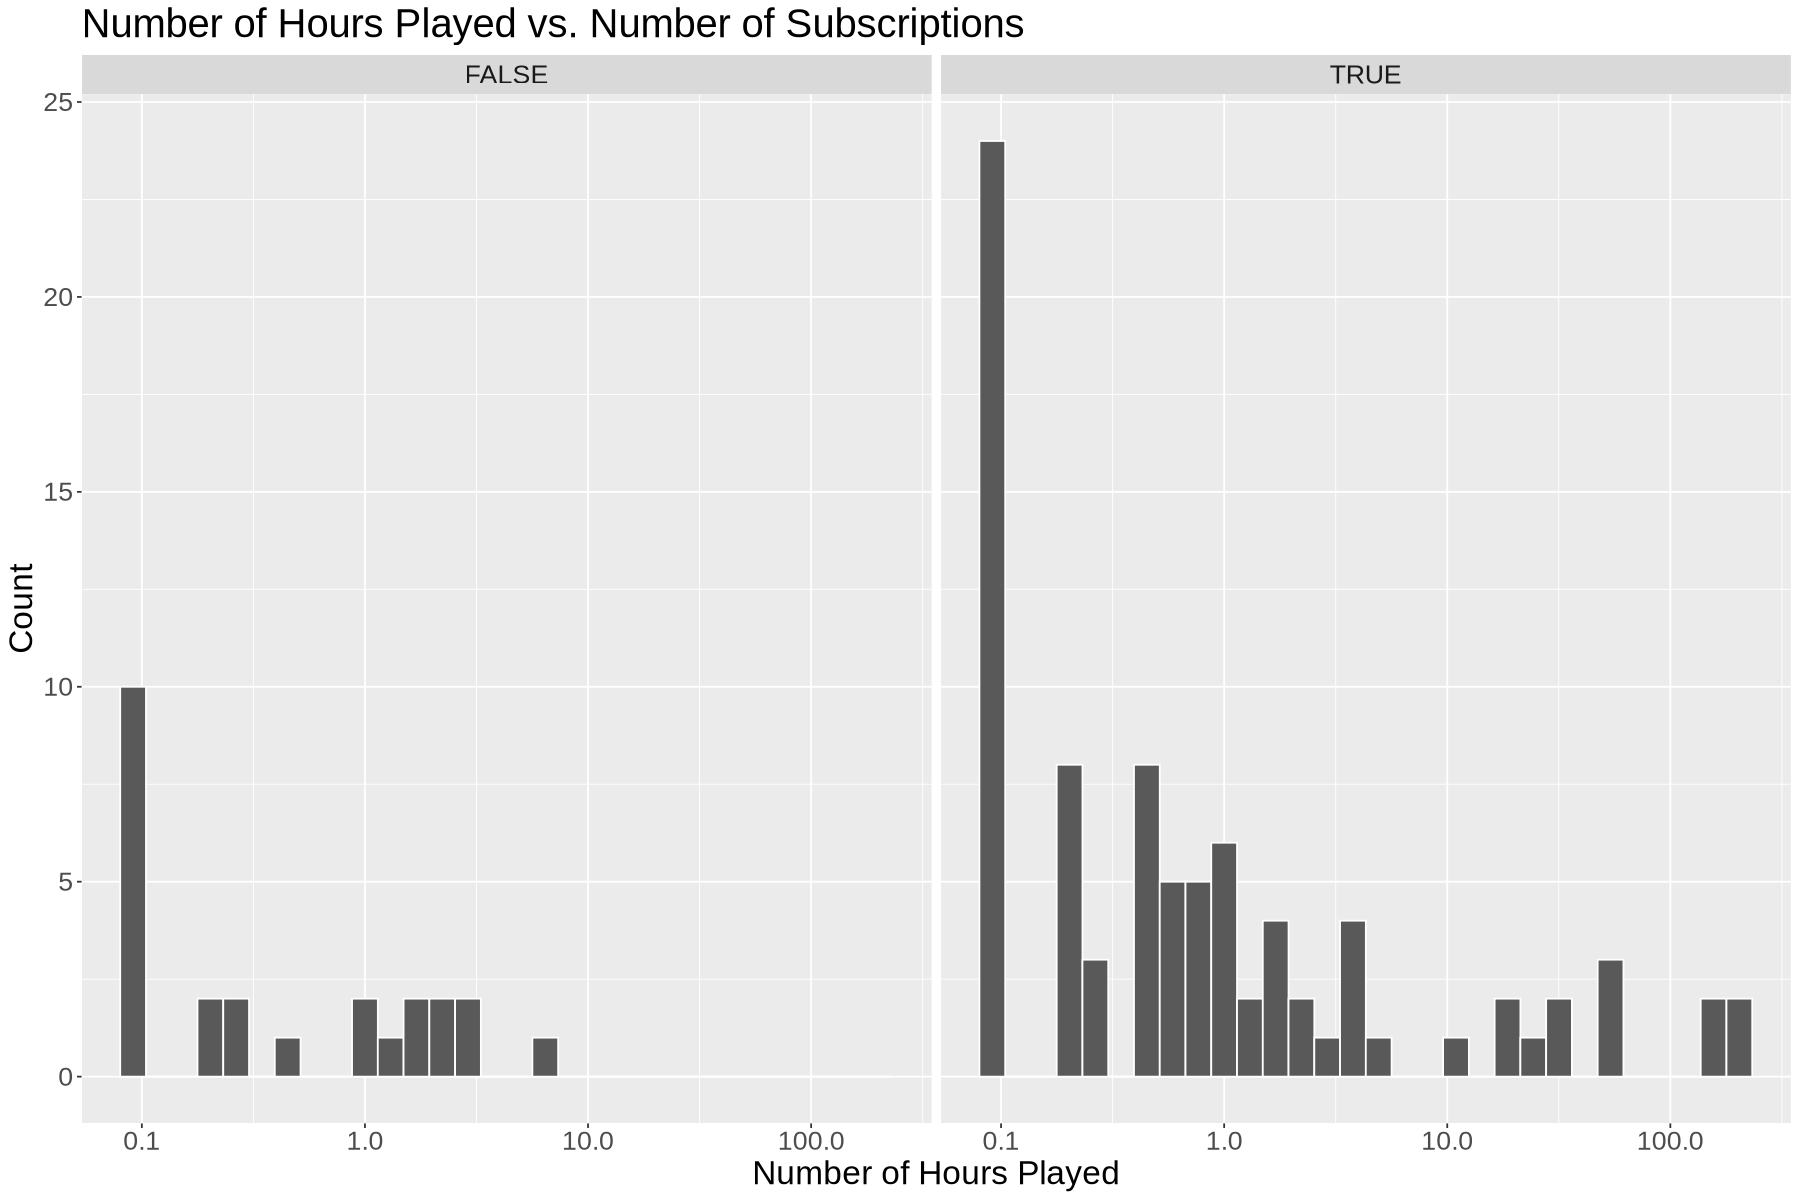

In [36]:
options(repr.plot.width = 15, repr.plot.height = 10)
players_hours <- players_clean |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(bins = 30, color = "white") +
    scale_x_log10() +
    facet_wrap(~subscribe) +
    labs(title = "Number of Hours Played vs. Number of Subscriptions", x = "Number of Hours Played", y = "Count") +
    theme(text = element_text(size = 20))
players_hours

We see that people with more hours played are more likely to be subscribed, but it is a rather weak relationship, as a large majority of players subscribed also have a lower amount of hours played.

Looking at player age:

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


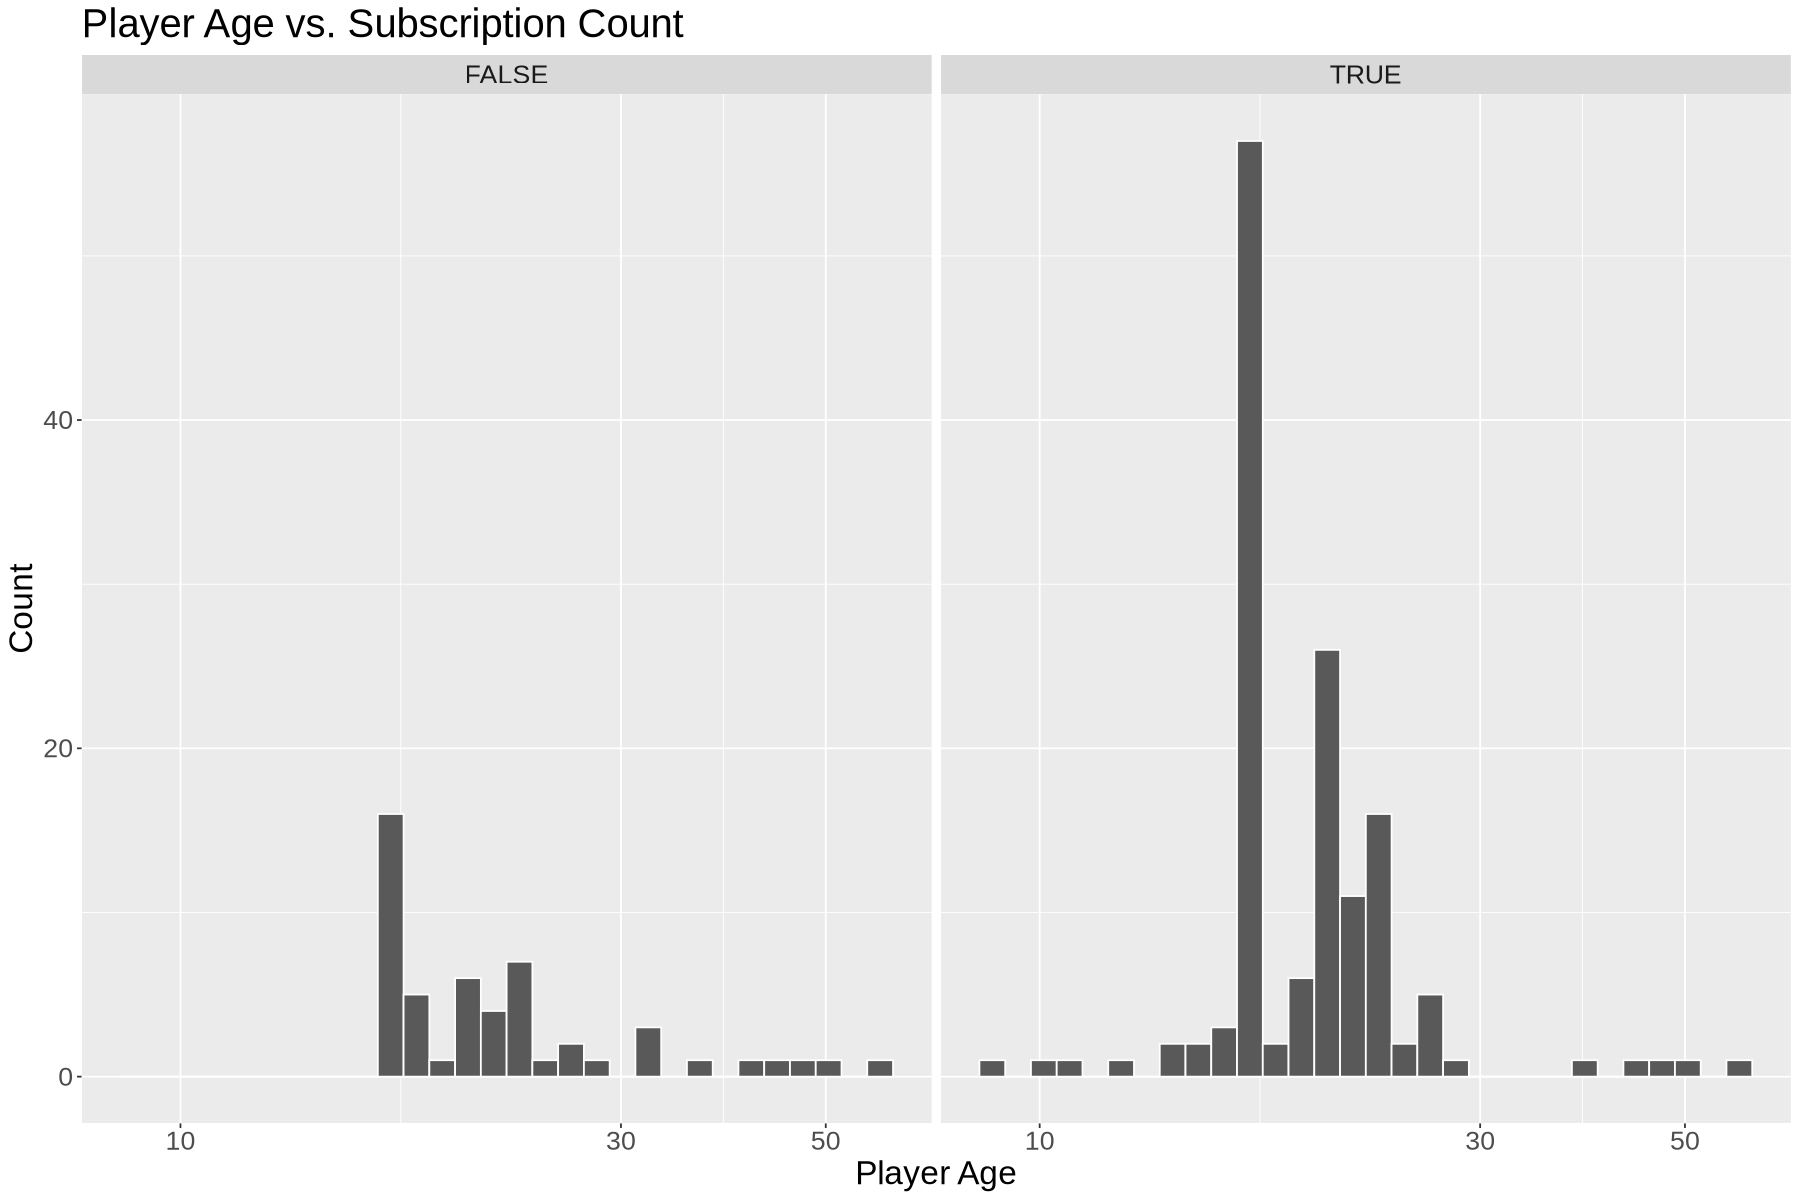

In [39]:
options(repr.plot.width = 15, repr.plot.height = 10)
players_age <- players_clean |>
    ggplot(aes(x = Age)) +
    geom_histogram(bins = 30, color = "white") +
    scale_x_log10() +
    facet_wrap(~subscribe) +
    labs(title = "Player Age vs. Subscription Count", x = "Player Age", y = "Count") +
    theme(text = element_text(size = 20))
players_age

We see that there seems to be a correlation between the player's age and number of people subscibed. We see that the majority of players are around 15 to 30 years old, with a huge peak in players that are subscribed at around 15 years old. However, this is a weak relationship, as we see there is a similar relationship between players that are subscribed and players that are not subscribed for most of the ages.

We can visualize the relationships using a scatterplot:

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


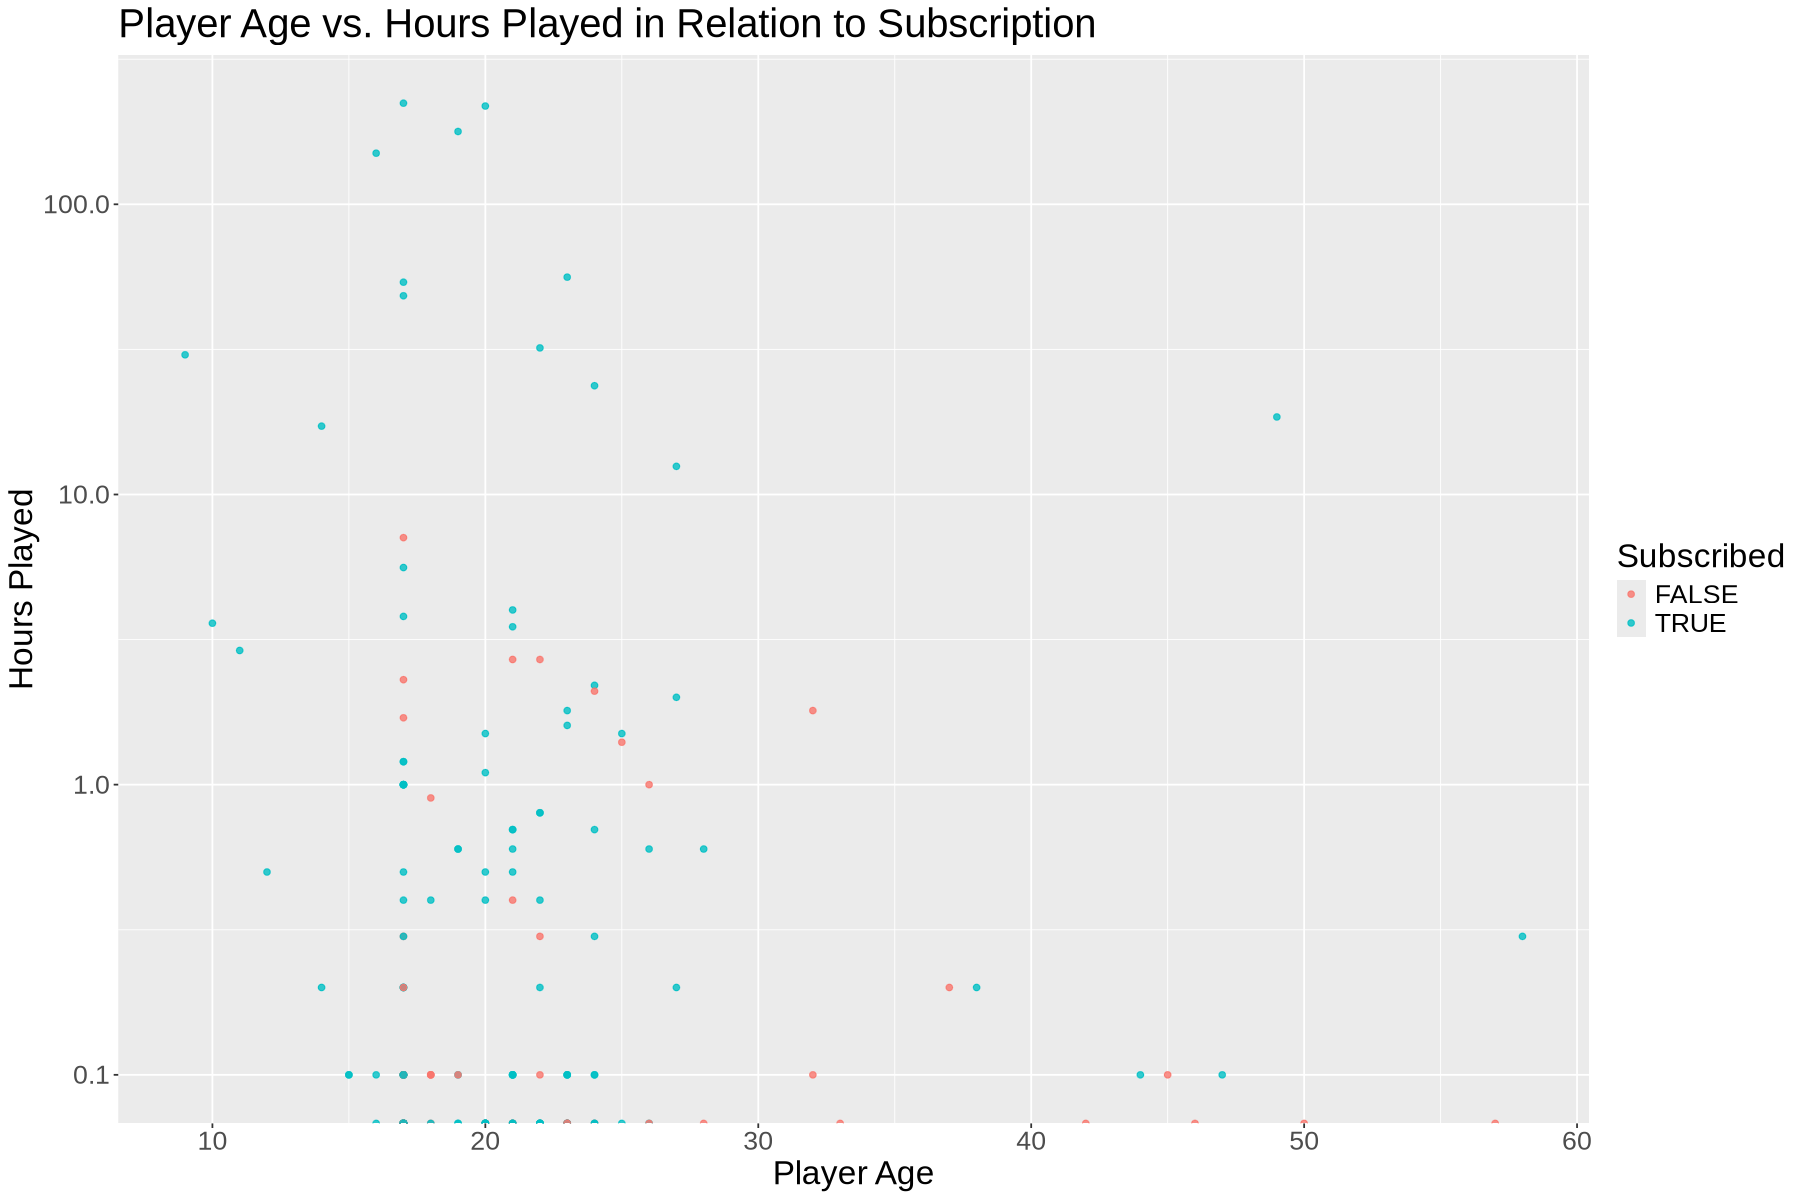

In [44]:
players_relationship <- players_clean |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point(alpha = 0.8) +
    scale_y_log10() +
    labs(title = "Player Age vs. Hours Played in Relation to Subscription", x = "Player Age", y = "Hours Played", colour = "Subscribed") +
    theme(text = element_text(size = 20))
players_relationship

Although not a strong relationship, there are a lot more players around the 15 to 30 age range that have a higher amount of hours played that are subscribed. However, there are many more players that have a lower amount of hours played, which may skew results.

## KNN Classification Modeling

Since the outcome variable (newsletter subscription) is binary, this problem will formulate as a classification task. We will use KNN Classfication to model the answer of questions.

Before we modeling the data, we need to check the missing data in our data set and consider what methods should we use, drop them or impute the missing entries.

In [47]:
players_NAinfo <- players_clean |>
  filter(if_any(everything(), is.na))
players_NAinfo 

experience,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
Regular,TRUE,0.1,NA
Pro,TRUE,0.2,NA


Fortunately, we only have 2 missing data in the data set of players, 2 of 196 is not very important.
So we will use drop_na() function to solve the missing data.

In [11]:
player_modeldata <- players_clean |>
  select(subscribe, played_hours,Age)|> drop_na()
player_modeldata

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
⋮,⋮,⋮
FALSE,0.3,22
FALSE,0.0,57
FALSE,2.3,17


In [16]:
set.seed(123)
players_split <- initial_split(player_modeldata, prop = 0.8,strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

In [33]:
#recipe
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) 
players_recipe 



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [39]:
#Model setup: 
players_spec <- nearest_neighbor(mode = "classification",
                                 neighbors = tune()) |>
                                 set_engine("kknn") 

players_workflow <- workflow()|>
  add_model(players_spec)|>
  add_recipe(players_recipe)

#Set up tuning grid for k
players_grid <- tibble(neighbors = seq(from = 1, to = 15, by = 2))

#Create cross-validation folds
set.seed(123)
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

In [41]:
#Model training: 
players_results <- players_workflow |>
    tune_grid(resamples = players_vfold ,
              grid = players_grid,
              metrics = metric_set(accuracy))

players_metrics <- collect_metrics(players_results)
players_metrics

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4604435,5,0.02420314,Preprocessor1_Model1
3,accuracy,binary,0.4671102,5,0.02323508,Preprocessor1_Model2
5,accuracy,binary,0.4997984,5,0.02453929,Preprocessor1_Model3
⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,accuracy,binary,0.6496909,5,0.04853682,Preprocessor1_Model6
13,accuracy,binary,0.6561425,5,0.05191348,Preprocessor1_Model7
15,accuracy,binary,0.6765726,5,0.03984151,Preprocessor1_Model8


In [49]:
# choose best k
best_k <- players_results |>
  select_best("accuracy") 
best_k

neighbors,.config
<dbl>,<chr>
15,Preprocessor1_Model8


In [50]:
#fit into test data
final_knn <- finalize_workflow(players_workflow , best_k)

final_fit <- final_knn |>
  fit(data = players_train)

In [51]:
# see the final result
predictions <- predict(final_fit, new_data = players_test) |>
  bind_cols(players_test)

head(predictions)

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,3.8,17
FALSE,FALSE,0.0,17
TRUE,FALSE,0.0,21
TRUE,TRUE,48.4,17
FALSE,TRUE,0.3,58
FALSE,FALSE,0.1,18


### 1.Why KNN fits the question? 
`--Does the player's total hours played and age predict whether they subscribe to the newsletter? `

KNN (k-Nearest Neighbors) is suitable for this problem because the task is to predict whether a player subscribes to the newsletter (a categorical outcome: TRUE/FALSE) based on numerical features like played_hours and Age.

It does not need to assume function relationship between the predictors and the outcome.

Since we only have a few predictors and a moderate-sized dataset, KNN can efficiently leverage the distance information to classify new players based on their nearest neighbors.


### 2.Why standardization is necessary

Standardization is crucial because KNN relies on distance calculations (typically Euclidean distance) to find nearest neighbors.

Features like played_hours and Age are on different scales (played_hours might range 0–50, while Age ranges 0–60).

Without standardization, features with larger ranges dominate the distance computation, causing the model to ignore smaller-scale features, which can bias predictions.

By standardizing all numeric predictors to have mean 0 and standard deviation 1, each feature contributes equally to the distance, ensuring fair comparison between observations.

### 3.How K was chosen
The optimal number of neighbors 
𝑘
k was chosen through cross-validation on the training set:

A grid of possible k values was defined (e.g., 1, 3, 5, 7, 9, 11).

For each candidate k, the model was trained on multiple v-fold cross-validation splits of the training data.

The accuracy of each k was averaged across folds.

The k with the highest average accuracy was selected as the final parameter.

This method ensures that the chosen k balances bias and variance:

Too small k → model may overfit (high variance)

Too large k → model may oversmooth (high bias)